<a href="https://colab.research.google.com/github/Thofa90/Sales-and-Customers-Behavior-Insights--Green-Cart-Ltd/blob/main/Week2_project_DataWrangling%26Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title: Sales & Customer Behaviour Insights – Green Cart Ltd.**

**Business Scenario**

You’ve joined Green Cart Ltd., a growing UK-based e-commerce company focused on eco-friendly household products. The company is preparing for its Q2 performance review, and your manager on the Data & Insights team has asked you to investigate sales and customer behaviour across regions and product lines. You’ve been given access to sales, product, and customer datasets, and your job is to:

• Clean and merge the data

• Create new features

• Analyse patterns and performance

• Present insights using charts and summary tables

The findings will inform upcoming marketing and operational strategies.

# **Project Aim**

The primary aim of this project is to analyze sales performance and customer behaviour at Green Cart Ltd. by transforming raw sales, product, and customer data into meaningful insights. The project focuses on cleaning and merging multiple datasets, engineering relevant features, and exploring trends across regions and product lines to support data-driven decision-making ahead of the Q2 performance review.

# **Real-World Application & Business Impact**

**Application**

This analysis directly supports real business use cases in an e-commerce environment:

**•	Sales Strategy:**

Identify top-performing and underperforming products across regions to refine pricing, promotions, and product focus.

**•	Marketing Optimization:**

Understand customer purchasing behaviour, repeat purchase patterns, and regional preferences to enable targeted marketing campaigns.

**•	Operational Planning:**

Use demand patterns and seasonality insights to improve inventory management and reduce stockouts or overstocking.

**•	Customer Segmentation:**

Group customers based on buying frequency, order value, and product preferences to support personalized offers and retention strategies.

**Business Impact**

•	Enables data-driven Q2 planning instead of intuition-based decisions

•	Improves marketing ROI through targeted regional and product-level campaigns

•	Supports revenue growth by focusing on high-value customers and products

•	Reduces operational inefficiencies via better demand forecasting and inventory planning

•	Enhances executive decision-making with clear dashboards, charts, and summary tables

# **Task**

## **1. Loading the dataset**

In [799]:
from google.colab import drive
drive.mount('/content/drive')
base_path = "/content/drive/My Drive/Datasets"

import pandas as pd

sales_df = pd.read_csv(f"{base_path}/sales_data.csv")
product_df = pd.read_csv(f"{base_path}/product_info.csv")
customer_df = pd.read_csv(f"{base_path}/customer_info.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [800]:
sales_df.head(4)

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
0,O966977,C00397,P0022,3,39.25,06-07-2025,Delivered,PayPal,Central,0.00
1,O696648,C00236,P0023,5,18.92,06-07-2025,DELAYED,credit card,North,0.00
2,O202644,C00492,P0011,1,29.68,07-07-2025,delivered,Bank Transfer,North,0.15
3,O501803,C00031,P0003,1,32.76,08-07-2025,Cancelled,Credit Card,Central,0.20


In [801]:
product_df.head(4)

,product_id,product_name,category,launch_date,base_price,supplier_code
0,P0001,Storage Product 39,Storage,11-03-25,15.88,S339
1,P0002,Cleaning Product 82,Cleaning,18-08-24,34.23,S974
2,P0003,Cleaning Product 85,Cleaning,15-07-24,7.92,S745
3,P0004,Kitchen Product 82,Kitchen,19-04-25,9.13,S589


In [802]:
customer_df.head(4)

,customer_id,email,signup_date,gender,region,loyalty_tier
0,C00001,shaneramirez@gmail.com,26-04-25,Male,Central,Silver
1,C00002,jpeterson@bernard.com,11-08-24,Female,Central,gold
2,C00003,howardmaurice@yahoo.com,15-05-25,male,Central,gold
3,C00004,yherrera@arnold.org,14-06-25,FEMALE,Central,GOLD


## **2. Cleaning the Data**

### **2.1 Cleaning Sales Data**

In [803]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          2999 non-null   object 
 1   customer_id       2998 non-null   object 
 2   product_id        2995 non-null   object 
 3   quantity          2997 non-null   object 
 4   unit_price        2999 non-null   float64
 5   order_date        2998 non-null   object 
 6   delivery_status   2997 non-null   object 
 7   payment_method    2997 non-null   object 
 8   region            3000 non-null   object 
 9   discount_applied  2483 non-null   float64
dtypes: float64(2), object(8)
memory usage: 234.5+ KB


In [804]:
for col in sales_df.columns:
    print(f"\n🔹 Column: {col}")
    print(sales_df[col].value_counts(dropna=False))


🔹 Column: order_id
order_id
O916245    2
O515400    2
O719698    1
O531707    1
O426596    1
          ..
O720749    1
O842017    1
O605680    1
O606964    1
O438379    1
Name: count, Length: 2998, dtype: int64

🔹 Column: customer_id
customer_id
C00385    15
C00062    14
C00294    13
C00108    13
C00245    12
          ..
C00135     1
C00444     1
C00036     1
C00367     1
C00241     1
Name: count, Length: 500, dtype: int64

🔹 Column: product_id
product_id
P0010    122
P0011    118
P0027    116
P0014    110
P0025    108
P0015    108
P0017    107
P0022    106
P0023    105
P0006    104
P0007    103
P0013    102
P0020    100
P0008     99
P0026     99
P0004     98
P0012     97
P0030     97
P0028     97
P0021     96
P0016     96
P0029     95
P0005     92
P0018     92
P0024     91
P0003     91
P0019     91
P0001     88
P0002     87
P0009     80
NaN        5
Name: count, dtype: int64

🔹 Column: quantity
quantity
2        635
5        605
3        598
4        582
1        575
NaN        3
th

#### **a. Standardise text formatting**

In [805]:
# Standardise text formatting (base cleanup)

sales_df['delivery_status'] = (
    sales_df['delivery_status']
    .str.strip()
    .str.lower()
    .str.title()
)

sales_df['payment_method'] = (
    sales_df['payment_method']
    .str.strip()
    .str.lower()
    .str.title()
)

sales_df['region'] = (
    sales_df['region']
    .str.strip()
    .str.lower()
    .str.title())

In [806]:
sales_df['delivery_status'].value_counts()

,count
delivery_status,
Delivered,1231
Delayed,1173
Cancelled,591
Delrd,1
Delyd,1


In [807]:
sales_df['payment_method'].value_counts()

,count
payment_method,
Credit Card,1453
Bank Transfer,780
Paypal,763
Bank Transfr,1


In [808]:
sales_df['region'].value_counts()

,count
region,
North,605
Central,603
East,602
South,596
West,593
Nrth,1


✔ Removes leading/trailing spaces
✔ Fixes casing inconsistencies
✔ Keeps regions readable (North, South, etc.)
✔ Produces clean values like Delayed, Delivered, Credit Card

In [809]:
# Fix remaining typos

# Delivery status corrections
sales_df['delivery_status'] = sales_df['delivery_status'].replace({
    'Delrd': 'Delivered',
    'Delyd': 'Delayed'
})

# Payment method corrections
sales_df['payment_method'] = sales_df['payment_method'].replace({
    'Bank Transfr': 'Bank Transfer'
})

# Region corrections
sales_df['region'] = sales_df['region'].replace({
    'Nrth': 'North'
})

In [810]:
print(sales_df['delivery_status'].value_counts(dropna=False))
print(sales_df['payment_method'].value_counts(dropna=False))
print(sales_df['region'].value_counts(dropna=False))

delivery_status
Delivered    1232
Delayed      1174
Cancelled     591
NaN             3
Name: count, dtype: int64
payment_method
Credit Card      1453
Bank Transfer     781
Paypal            763
NaN                 3
Name: count, dtype: int64
region
North      606
Central    603
East       602
South      596
West       593
Name: count, dtype: int64


#### **b. Convert order_date to datetime**

In [811]:
sales_df['order_date'] = pd.to_datetime(
    sales_df['order_date'],
    format='%d-%m-%Y',
    errors='coerce'
)

In [812]:
sales_df['order_date'].dtype

dtype('<M8[ns]')

Why this is best practice
	•	format='%d-%m-%Y' → avoids wrong day/month parsing
	•	errors='coerce' → invalid dates become NaT instead of crashing

In [813]:
sales_df['order_date'].head()

,order_date
0,2025-07-06
1,2025-07-06
2,2025-07-07
3,2025-07-08
4,2025-07-08


#### **c. Handling missing values**

In [814]:
sales_df.isnull().sum()

,0
order_id,1
customer_id,2
product_id,5
quantity,3
unit_price,1
order_date,2
delivery_status,3
payment_method,3
region,0
discount_applied,517


In [815]:
sales_df[sales_df.isnull().any(axis=1)]

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
13,O135982,C00441,P0003,2,38.11,2025-07-26,Delivered,Paypal,North,NaN
14,O870079,C00274,P0013,1,49.71,2025-07-28,Delayed,Credit Card,East,NaN
22,O930213,C00369,P0010,4,10.43,2025-07-26,Cancelled,Paypal,South,NaN
24,O471486,C00423,P0007,2,39.93,2025-07-24,Cancelled,Paypal,Central,NaN
26,O860527,C00334,P0025,5,46.67,2025-07-22,Delayed,Paypal,South,NaN
...,...,...,...,...,...,...,...,...,...,...
2953,O450828,C00480,P0028,5,16.59,2025-06-05,Delayed,Paypal,Central,NaN
2964,O486139,C00407,P0020,3,10.85,2025-05-16,Delayed,Bank Transfer,Central,NaN
2965,O284155,C00292,P0030,4,17.73,2025-06-03,Delayed,Paypal,West,NaN
2967,O459090,C00199,P0013,5,44.93,2025-06-03,Delivered,Bank Transfer,Central,NaN


**Handle numeric missing values**

discount_applied

Business logic:

	•	Missing discount usually means no discount applied
	•	Replacing with 0.0 avoids losing valid sales rows

In [816]:
sales_df['discount_applied'] = sales_df['discount_applied'].fillna(0.0)

**Handle categorical missing values**

For categorical columns, missing values don’t invalidate the record but should be explicitly labeled.

Why this works:

	•	Preserves row count
	•	Keeps transactions usable for aggregation
	•	Makes missing data visible in analysis

In [817]:
categorical_cols = ['delivery_status', 'payment_method', 'region']

sales_df[categorical_cols] = sales_df[categorical_cols].fillna('Unknown')

In [818]:
sales_df.isnull().sum()

,0
order_id,1
customer_id,2
product_id,5
quantity,3
unit_price,1
order_date,2
delivery_status,0
payment_method,0
region,0
discount_applied,0


In [819]:
critical_cols = [
    'order_id',
    'customer_id',
    'product_id',
    'quantity',
    'unit_price',
    'order_date'
]

sales_df[sales_df[critical_cols].isnull().any(axis=1)]

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
496,O837867,C00350,P0028,4,NaN,2025-08-03,Delivered,Credit Card,East,0.15
569,O711887,C00125,NaN,5,36.65,2025-05-22,Cancelled,Bank Transfer,South,0.15
613,O231318,C00251,NaN,5,47.51,2025-05-24,Delivered,Paypal,West,0.20
851,O663482,NaN,P0029,3,18.89,2025-04-02,Cancelled,Paypal,West,0.05
862,NaN,C00237,P0013,1,39.26,2025-05-11,Delayed,Credit Card,West,0.20
1113,O718743,C00209,P0024,NaN,43.59,2025-08-17,Delivered,Credit Card,Central,0.00
1267,O327646,C00451,NaN,4,29.16,2025-05-31,Delayed,Credit Card,West,0.15
1373,O746155,C00158,P0003,2,45.43,NaT,Delivered,Credit Card,Central,0.00
1707,O735004,NaN,P0017,2,12.18,2025-07-01,Delivered,Bank Transfer,Central,0.00
1712,O490113,C00286,P0010,NaN,13.49,2025-07-01,Delayed,Bank Transfer,South,0.20


**🚨 Why these CANNOT be filled casually**

❌ Why NOT fill with defaults
	•	order_id, customer_id, product_id
→ Cannot invent IDs ❌
	•	quantity, unit_price
→ Would corrupt revenue calculations ❌
	•	order_date
→ Breaks time-series analysis ❌

👉 These rows are analytically unreliable

**Drop Rows**

 Dropping rows with NaN

    'order_id',
    'customer_id',
    'product_id',
    'quantity',
    'unit_price',
    'order_date'
    
Reason:

	•	Very small number of rows
	•	Core business fields missing
	•	Cannot be imputed without assumptions

In [820]:
sales_df = sales_df.dropna(subset=critical_cols)

In [821]:
sales_df.isnull().sum()

,0
order_id,0
customer_id,0
product_id,0
quantity,0
unit_price,0
order_date,0
delivery_status,0
payment_method,0
region,0
discount_applied,0


**Handling Critical Missing Values**

Missing values were identified in key transactional fields such as order ID, customer ID, product ID, quantity, unit price, and order date.  
These fields are essential for accurate sales analysis and revenue calculation and cannot be reliably imputed without introducing bias.

Given the small number of affected records, rows containing missing values in these critical columns were removed to maintain data integrity.

#### **d. Remmove duplicates**

In [822]:
sales_df.duplicated().sum()

np.int64(0)

No rows are exact duplicates across all columns.

In [823]:
sales_df['order_id'].duplicated().sum()

np.int64(2)

In [824]:
sales_df[sales_df['order_id'].duplicated(keep=False)].sort_values('order_id')

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
156,O515400,C00103,P0024,4,44.15,2025-06-18,Delivered,Paypal,East,0.15
1461,O515400,C00389,P0027,2,22.04,2025-07-28,Delayed,Paypal,North,0.05
793,O916245,C00390,P0010,1,24.57,2025-05-30,Delayed,Paypal,South,0.10
2712,O916245,C00070,P0011,3,20.83,2025-06-27,Delayed,Bank Transfer,West,0.05


🔍 Duplicate Analysis – Justification

What was found

	•	0 exact duplicate rows across all columns
	•	2 duplicated order_ids
	•	Each duplicated order_id is associated with:
	•	Different customer_id
	•	Different product_id
	•	Different dates, quantities, and prices

These could be accidental row duplicates. Different product id can have same order id but for each unique order id, customer id should be unique.

In [825]:
sales_df = sales_df.drop_duplicates(subset='order_id', keep='first')

In [826]:
sales_df['order_id'].duplicated().sum()

np.int64(0)

#### **e. Validate numeric columns**

In [827]:
sales_df.dtypes

,0
order_id,object
customer_id,object
product_id,object
quantity,object
unit_price,float64
order_date,datetime64[ns]
delivery_status,object
payment_method,object
region,object
discount_applied,float64


In [828]:
sales_df[pd.to_numeric(sales_df['quantity'], errors='coerce').isna()] # where quantity is not a valid number

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
2344,O624662,C00185,P0026,three,35.43,2025-08-04,Delivered,Bank Transfer,East,0.0
2768,O557598,C00010,P0002,five,26.68,2025-07-06,Delayed,Credit Card,East,0.2


In [829]:
word_to_num = {
    'three': 3,
    'five': 5
}
sales_df['quantity'] = (
    sales_df['quantity']
    .astype(str)
    .str.lower()
    .replace(word_to_num)
)
sales_df['quantity'] = pd.to_numeric(sales_df['quantity'], errors='coerce')

In [830]:
# Validate non negative numeric values
sales_df[
    (sales_df['quantity'] < 0) |
    (sales_df['unit_price'] < 0) |
    (sales_df['discount_applied'] < 0)
]

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied


In [831]:
sales_df[~sales_df['discount_applied'].between(0, 1)]

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied


In [832]:
sales_df[['quantity', 'unit_price', 'discount_applied']].describe()

,quantity,unit_price,discount_applied
count,2984.000000,2984.000000,2984.000000
mean,3.001676,28.944789,0.082892
std,1.408631,12.083641,0.074044
min,1.000000,8.000000,0.000000
25%,2.000000,18.817500,0.000000
50%,3.000000,28.640000,0.050000
75%,4.000000,39.635000,0.150000
max,5.000000,49.990000,0.200000


Business logic:

	•	quantity < 0 → invalid transaction ❌
	•	unit_price < 0 → invalid pricing ❌
	•	discount_applied must be between 0 and 1

 Sales does not have any negative  quantity and unit_price and discount is aligned between 0 to 1.

In [833]:
sales_df.dtypes

,0
order_id,object
customer_id,object
product_id,object
quantity,int64
unit_price,float64
order_date,datetime64[ns]
delivery_status,object
payment_method,object
region,object
discount_applied,float64


In [834]:
print(sales_df['quantity'].dtype)
sales_df['quantity'].value_counts().head()

int64


,count
quantity,
2,632
5,603
3,596
4,579
1,574


#### **f. Sales Data Cleaning Summary**


**Data Quality Issues Identified**

	•	Inconsistent text formatting (e.g. DELAYED--> Delayed, delivered, extra spaces)
	•	Missing values in critical transactional fields
	•	Duplicate order_id values (multi-line orders)
	•	Incorrect data types (quantity stored as object)
	•	Invalid numeric entries (string quantities like "three")
	•	Potential negative or invalid numeric values

**Cleaning Actions Taken**

	1. Standardised categorical columns (delivery_status, payment_method, region) using:

	•	.str.strip(), .str.lower(), .str.title()
	•	Explicit mappings for typos (e.g. delyd → Delayed)
	•	Converted order_date to datetime64[ns]
	•	Identified and inspected missing values using .isnull().sum()

	2. Dropped rows with missing critical fields:

	•	order_id, customer_id, product_id, quantity, unit_price, order_date

	3. Filled non-critical missing values:
	•	discount_applied → 0.0 and categorical field → 'Unknown'

	4. Validated numeric columns:

	•	Ensured quantity ≥ 0, unit_price ≥ 0, discount_applied ∈ [0,1]
	•	Converted quantity from object → numeric:
	•	Mapped word values ("three" → 3, "five" → 5)

	5. Checked duplicates:

	•	Confirmed no full-row duplicates
	•	Identified duplicate order_ids as valid multi-line orders
	•	Created a deduplicated order-level dataset using:
	•	drop_duplicates(subset='order_id') for KPI analysis

**Result**

	•	Clean, consistent, analysis-ready sales data
	•	Preserved valid transactions while preventing double-counting

### **2.2 Cleaning Product Info Data**

In [835]:
product_df.head(2)

,product_id,product_name,category,launch_date,base_price,supplier_code
0,P0001,Storage Product 39,Storage,11-03-25,15.88,S339
1,P0002,Cleaning Product 82,Cleaning,18-08-24,34.23,S974


In [836]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     30 non-null     object 
 1   product_name   30 non-null     object 
 2   category       30 non-null     object 
 3   launch_date    30 non-null     object 
 4   base_price     30 non-null     float64
 5   supplier_code  30 non-null     object 
dtypes: float64(1), object(5)
memory usage: 1.5+ KB


In [837]:
product_df.isnull().sum()

,0
product_id,0
product_name,0
category,0
launch_date,0
base_price,0
supplier_code,0


In [838]:
product_df.duplicated().sum()

np.int64(0)

In [839]:
product_df['product_id'].duplicated().sum()

np.int64(0)

In [840]:
for col in product_df.columns:
    print(f"\n🔹 Column: {col}")
    print(product_df[col].value_counts(dropna=False))


🔹 Column: product_id
product_id
P0001    1
P0002    1
P0003    1
P0004    1
P0005    1
P0006    1
P0007    1
P0008    1
P0009    1
P0010    1
P0011    1
P0012    1
P0013    1
P0014    1
P0015    1
P0016    1
P0017    1
P0018    1
P0019    1
P0020    1
P0021    1
P0022    1
P0023    1
P0024    1
P0025    1
P0026    1
P0027    1
P0028    1
P0029    1
P0030    1
Name: count, dtype: int64

🔹 Column: product_name
product_name
Storage Product 39          1
Cleaning Product 82         1
Cleaning Product 85         1
Kitchen Product 82          1
Personal Care Product 1     1
Cleaning Product 16         1
Personal Care Product 64    1
Storage Product 47          1
Outdoors Product 13         1
Cleaning Product 70         1
Kitchen Product 53          1
Cleaning Product 29         1
Cleaning Product 94         1
Outdoors Product 91         1
Storage Product 10          1
Cleaning Product 53         1
Personal Care Product 11    1
Storage Product 37          1
Kitchen Product 42          1
Clea

#### **a. Standardise text formatting**

In [841]:
text_cols = ['product_name', 'category', 'supplier_code']

product_df[text_cols] = (
    product_df[text_cols]
    .apply(lambda x: x.str.strip().str.title())
)

In [842]:
product_df['product_id'].is_unique

True

#### **b. Convert launch date to date-time**

In [843]:
product_df['launch_date'] = pd.to_datetime(
    product_df['launch_date'],
    format='%d-%m-%y',
    errors='coerce'
)

In [844]:
print(product_df['launch_date'].dtype)
product_df[['launch_date']].head()

datetime64[ns]


,launch_date
0,2025-03-11
1,2024-08-18
2,2024-07-15
3,2025-04-19
4,2024-10-20


#### **c. NO missing value and no duplicates**

In [845]:
print(product_df.isnull().sum())
print(product_df.duplicated().sum())

product_id       0
product_name     0
category         0
launch_date      0
base_price       0
supplier_code    0
dtype: int64
0


#### **d. Validate numeric column**

In [846]:
product_df[product_df['base_price'] < 0]

,product_id,product_name,category,launch_date,base_price,supplier_code


No negative price.

In [847]:
product_df['base_price'].describe()

,base_price
count,30.000000
mean,22.844333
std,10.269165
min,6.080000
25%,14.812500
50%,23.230000
75%,31.745000
max,39.210000


#### **e. Cleaning Summary of Product Info Data**

**Data Quality Issues Identified**

	•	launch_date stored as object
	•	Potential risk of inconsistent text formatting
	•	Need to validate pricing logic

**Cleaning Actions Taken**

	•	Converted launch_date from object → datetime64[ns] using explicit format (%d-%m-%y)
	•	Standardised text columns (product_name, category, supplier_code)
	•	Validated numeric column:
	•	Confirmed base_price contains no negative values
	•	Verified uniqueness of product_id
	•	(Optional) Created derived features:
	•	No null and duplicates

**Result**

	•	Fully clean product dataset
	•	Ready for safe joins and time-based analysis

### **2.3 Cleaning Customer Info data**

In [848]:
customer_df.head(2)

,customer_id,email,signup_date,gender,region,loyalty_tier
0,C00001,shaneramirez@gmail.com,26-04-25,Male,Central,Silver
1,C00002,jpeterson@bernard.com,11-08-24,Female,Central,gold


In [849]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   497 non-null    object
 1   email         494 non-null    object
 2   signup_date   496 non-null    object
 3   gender        496 non-null    object
 4   region        497 non-null    object
 5   loyalty_tier  498 non-null    object
dtypes: object(6)
memory usage: 23.6+ KB


In [850]:
for col in customer_df.columns:
    print(f"\n🔹 Column: {col}")
    print(customer_df[col].value_counts(dropna=False))


🔹 Column: customer_id
customer_id
NaN       3
C00341    1
C00340    1
C00339    1
C00338    1
         ..
C00159    1
C00158    1
C00157    1
C00156    1
C00171    1
Name: count, Length: 498, dtype: int64

🔹 Column: email
email
NaN                             6
mjones@yahoo.com                1
cynthiaallen@hotmail.com        1
brittanygardner@saunders.com    1
markramirez@yahoo.com           1
                               ..
joshuaschultz@joseph.com        1
cjoseph@lam.org                 1
browntimothy@yahoo.com          1
ngordon@acosta.net              1
alawson@yahoo.com               1
Name: count, Length: 495, dtype: int64

🔹 Column: signup_date
signup_date
10-08-24    7
11-08-24    5
05-02-25    5
24-11-24    5
31-01-25    5
           ..
29-03-25    1
03-03-25    1
15-12-24    1
08-01-25    1
21-11-24    1
Name: count, Length: 272, dtype: int64

🔹 Column: gender
gender
femle     92
male      88
FEMALE    85
Male      81
Other     77
Female    73
NaN        4
Name: count, d

#### **a. Standardise text formatting**

In [851]:
# Gender
customer_df['gender'] = (
    customer_df['gender']
    .astype(str).str.strip().str.lower()
)

# Region
customer_df['region'] = (
    customer_df['region']
    .astype(str).str.strip().str.lower().str.title()
)

# Loyalty tier
customer_df['loyalty_tier'] = (
    customer_df['loyalty_tier']
    .astype(str).str.strip().str.lower()
)

In [852]:
# Gender mapping
gender_map = {
    'femle': 'female',
    'female': 'female',
    'male': 'male',
    'other': 'other'
}
customer_df['gender'] = customer_df['gender'].replace(gender_map).str.title()

# Loyalty tier mapping
tier_map = {
    'gld': 'gold',
    'gold': 'gold',
    'sllver': 'silver',
    'silver': 'silver',
    'brnze': 'bronze',
    'bronze': 'bronze'
}
customer_df['loyalty_tier'] = customer_df['loyalty_tier'].replace(tier_map).str.title()

In [853]:
for col in ['gender', 'region', 'loyalty_tier']:
    print(f"\n🔹 {col}")
    print(customer_df[col].value_counts(dropna=False))



🔹 gender
gender
Female    250
Male      169
Other      77
Nan         4
Name: count, dtype: int64

🔹 region
region
East       103
North      101
West       100
South       99
Central     94
Nan          3
Name: count, dtype: int64

🔹 loyalty_tier
loyalty_tier
Gold      265
Silver    119
Bronze    114
Nan         2
Name: count, dtype: int64


#### **b. Convert sign-up to date time**

In [854]:
customer_df['signup_date'] = pd.to_datetime(
    customer_df['signup_date'],
    format='%d-%m-%y',
    errors='coerce'
)

In [855]:
print(customer_df['signup_date'].dtype)
customer_df[['signup_date']].head()

datetime64[ns]


,signup_date
0,2025-04-26
1,2024-08-11
2,2025-05-15
3,2025-06-14
4,2025-05-02


#### **c. Handling missing value**

In [856]:
import numpy as np

cols = ['gender', 'region', 'loyalty_tier']

# Turn string placeholders into real NaN
customer_df[cols] = customer_df[cols].replace(['Nan', 'nan', 'None', 'null', ''], np.nan)

# Now fill properly
customer_df['gender'] = customer_df['gender'].fillna('Other')
customer_df['region'] = customer_df['region'].fillna('Unknown')
customer_df['loyalty_tier'] = customer_df['loyalty_tier'].fillna('Unknown')

In [857]:
customer_df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [858]:
customer_df['region'].unique()

array(['Central', 'West', 'North', 'South', 'East', 'Unknown'],
      dtype=object)

In [859]:
customer_df['loyalty_tier'].unique()

array(['Silver', 'Gold', 'Bronze', 'Unknown'], dtype=object)

In [860]:
customer_df.isnull().sum()

,0
customer_id,3
email,6
signup_date,4
gender,0
region,0
loyalty_tier,0


In [861]:
# checking and fixing  inconsistency and missing values in email
customer_df['email_clean'] = (
    customer_df['email']
    .astype(str)
    .str.strip()
    .str.lower()
)

# turn common "missing" strings into NA
customer_df['email_clean'] = customer_df['email_clean'].replace(
    {'nan': 'Unknown', 'none': 'Unknown', 'null': 'Unknown', '': 'Unknown'}
)

In [862]:
customer_df.head(5)

,customer_id,email,signup_date,gender,region,loyalty_tier,email_clean
0,C00001,shaneramirez@gmail.com,2025-04-26,Male,Central,Silver,shaneramirez@gmail.com
1,C00002,jpeterson@bernard.com,2024-08-11,Female,Central,Gold,jpeterson@bernard.com
2,C00003,howardmaurice@yahoo.com,2025-05-15,Male,Central,Gold,howardmaurice@yahoo.com
3,C00004,yherrera@arnold.org,2025-06-14,Female,Central,Gold,yherrera@arnold.org
4,C00005,janetwilliams@gmail.com,2025-05-02,Male,West,Bronze,janetwilliams@gmail.com


In [863]:
customer_df[customer_df['email_clean'] == 'Unknown']

,customer_id,email,signup_date,gender,region,loyalty_tier,email_clean
87,C00088,NaN,2025-01-06,Male,West,Bronze,Unknown
147,C00148,NaN,2025-03-02,Male,West,Gold,Unknown
303,C00304,NaN,2024-11-02,Male,East,Gold,Unknown
339,C00340,NaN,2025-03-24,Male,Central,Bronze,Unknown
375,C00376,NaN,2024-07-12,Female,South,Bronze,Unknown
469,C00470,NaN,2024-07-17,Female,North,Silver,Unknown


In [864]:
# find invalid email format
email_pattern = r'^[a-z0-9._%+-]+@[a-z0-9.-]+\.[a-z]{2,}$'

invalid_emails = customer_df[
    customer_df['email_clean'].notna() &
    ~customer_df['email_clean'].str.match(email_pattern)
]

invalid_emails[['customer_id', 'email', 'email_clean']]

,customer_id,email,email_clean
87,C00088,NaN,Unknown
147,C00148,NaN,Unknown
303,C00304,NaN,Unknown
339,C00340,NaN,Unknown
375,C00376,NaN,Unknown
469,C00470,NaN,Unknown


In [865]:
# find duplicates email
duplicate_emails = customer_df[
    customer_df['email_clean'].notna() &
    customer_df['email_clean'].duplicated(keep=False)
].sort_values('email_clean')

duplicate_emails[['customer_id', 'email', 'email_clean']]

,customer_id,email,email_clean
87,C00088,NaN,Unknown
147,C00148,NaN,Unknown
303,C00304,NaN,Unknown
339,C00340,NaN,Unknown
375,C00376,NaN,Unknown
469,C00470,NaN,Unknown


In [866]:
# inconsistency summray
print("Missing emails:", customer_df['email_clean'].isna().sum())
print("Invalid format:", invalid_emails.shape[0])
print("Duplicate emails:", duplicate_emails['email_clean'].nunique())

Missing emails: 0
Invalid format: 6
Duplicate emails: 1


In [867]:
# dropping email column while we have email_clean column
customer_df = customer_df.drop(columns=['email'])

In [868]:
customer_df['email_clean'].isna().sum()

np.int64(0)

Email validation initially flagged valid emails due to case-sensitive regex matching.
Emails were standardised to lowercase before validation to ensure correct format checking.
After correction, valid email addresses were no longer incorrectly classified as invalid.

In [869]:
customer_df = customer_df.dropna(subset=['customer_id', 'signup_date'])

Why drop?

	•	Cannot identify or join customer
	•	Signup date required for cohort / tenure analysis

In [870]:
customer_df.isnull().sum()

,0
customer_id,0
signup_date,0
gender,0
region,0
loyalty_tier,0
email_clean,0


#### **d. No duplicates value & no numerical column**

#### **e. Customer data cleaning summary**

**Data Quality Issues Identified**

	•	Inconsistent categorical values (gender, loyalty_tier)
	•	Missing values in customer_id, email, signup_date
	•	Email format validation issues

**Cleaning Actions Taken**

	•	Standardised categorical columns:
	•	gender, region, loyalty_tier
	•	Fixed typos (femle → Female, gld → Gold, brnze → Bronze) and filled missing value with 'Unknown' in categorical fields.
	•	Identified missing values using .isnull().sum()
	•	Dropped rows with missing critical identifiers:
	•	customer_id, signup_date
	•	Filled missing email values with "Unknown"
	•	Create email_clean column and drop email column
	•	Standardised emails:
	•	Trimmed whitespace
	•	Converted to lowercase
	•	Validated email format using regex (after standardisation)
	•	Converted signup_date to datetime64[ns]

**Result**

	•	Clean, consistent customer dataset
	•	Ready for segmentation, lifecycle, and retention analysis

**✅ Overall Outcome**

	•	All three datasets are now:
	•	Free of critical missing values
	•	Properly typed
	•	Text-consistent
	•	Logically valid
	•	Data integrity preserved while minimizing data loss
	•	Datasets are fully prepared for:
	•	Merging
	•	Feature engineering
	•	Exploratory data analysis (EDA)
	•	Business insights and reporting

## **3. Merging 3 dataset**

In [871]:
# merge sales_df with product_df using product_id
sales_product_df = sales_df.merge(
    product_df,
    on='product_id',
    how='left' # how='left' ensures all sales transactions are preserved, even if product details are missing.
)

In [872]:
# merge the result with customer_df using customer_id
merged_df = sales_product_df.merge(
    customer_df,
    on='customer_id',
    how='left'
)

In [873]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2984 entries, 0 to 2983
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2984 non-null   object        
 1   customer_id       2984 non-null   object        
 2   product_id        2984 non-null   object        
 3   quantity          2984 non-null   int64         
 4   unit_price        2984 non-null   float64       
 5   order_date        2984 non-null   datetime64[ns]
 6   delivery_status   2984 non-null   object        
 7   payment_method    2984 non-null   object        
 8   region_x          2984 non-null   object        
 9   discount_applied  2984 non-null   float64       
 10  product_name      2984 non-null   object        
 11  category          2984 non-null   object        
 12  launch_date       2984 non-null   datetime64[ns]
 13  base_price        2984 non-null   float64       
 14  supplier_code     2984 n

In [874]:
merged_df.head(5)

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region_x,discount_applied,product_name,category,launch_date,base_price,supplier_code,signup_date,gender,region_y,loyalty_tier,email_clean
0,O966977,C00397,P0022,3,39.25,2025-07-06,Delivered,Paypal,Central,0.00,Cleaning Product 86,Cleaning,2024-10-04,19.77,S924,2024-09-08,Female,North,Silver,jacquelinemartin@mills-logan.com
1,O696648,C00236,P0023,5,18.92,2025-07-06,Delayed,Credit Card,North,0.00,Outdoors Product 32,Outdoors,2025-01-18,36.04,S907,2024-08-06,Other,North,Gold,georgeweber@morgan.com
2,O202644,C00492,P0011,1,29.68,2025-07-07,Delivered,Bank Transfer,North,0.15,Kitchen Product 53,Kitchen,2025-03-25,11.08,S645,2024-09-25,Male,Central,Gold,lcook@walters-smith.com
3,O501803,C00031,P0003,1,32.76,2025-07-08,Cancelled,Credit Card,Central,0.20,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745,2024-07-28,Female,Central,Gold,smoore@gmail.com
4,O322242,C00495,P0016,1,47.62,2025-07-08,Delayed,Credit Card,West,0.20,Cleaning Product 53,Cleaning,2025-02-20,26.71,S715,2024-09-18,Male,Central,Gold,mcclainkatherine@hotmail.com


**🔗 Merge Summary & Null Explanation**

    •	The merged dataset (merged_df) contains 2,984 sales transactions and 20 columns after combining sales, product, and customer data.
    •	All sales and product-related columns are fully populated (no missing values), confirming a successful merge on product_id.
    •	Customer-related columns (signup_date, gender, region_y, loyalty_tier, email_clean) contain 52 missing values.
    •	region_x is where the order was placed/delivered and region_y is customers home/registered region.


**Why do null values appear?**

	•	A left join was used to preserve all sales transactions.
	•	Some customer_ids in sales_df do not have matching records in customer_df.
	•	For these unmatched customers, pandas fills customer fields with NaN, which is expected and correct behavior for left joins.

In [875]:
merged_df = merged_df.rename(columns={
    'region_x': 'sales_region',
    'region_y': 'customer_region'
})

In [876]:
merged_df.columns

Index(['order_id', 'customer_id', 'product_id', 'quantity', 'unit_price',
       'order_date', 'delivery_status', 'payment_method', 'sales_region',
       'discount_applied', 'product_name', 'category', 'launch_date',
       'base_price', 'supplier_code', 'signup_date', 'gender',
       'customer_region', 'loyalty_tier', 'email_clean'],
      dtype='object')

## **4. Feature Engineering**

### **4.1 Revenue**

In [877]:
merged_df['revenue'] = (
    merged_df['quantity'] *
    merged_df['unit_price'] *
    (1 - merged_df['discount_applied'])
)

### **4.2 order_week (ISO week from order date)**

In [878]:
merged_df['order_week'] = merged_df['order_date'].dt.isocalendar().week

### **4.3 Price band (low/medium/high)**

In [1]:
merged_df['price_band'] = pd.cut(
    merged_df['unit_price'],
    bins=[-float('inf'), 15, 30, float('inf')],
    labels=['Low', 'Medium', 'High']
)

NameError: name 'pd' is not defined

### **4.4 Days to order (product life cycle gap)**

In [880]:
merged_df['days_to_order'] = (
    merged_df['order_date'] - merged_df['launch_date']
).dt.days

### **4.5 Email domain extraction**

In [881]:
merged_df['email_domain'] = (
    merged_df['email_clean']
    .where(merged_df['email_clean'] != 'Unknown')
    .str.split('@')
    .str[-1]
)

### **4.6 Is late delivery flag**

In [882]:
merged_df['is_late'] = merged_df['delivery_status'] == 'Delayed'

In [883]:
merged_df.head(5)

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,sales_region,discount_applied,...,gender,customer_region,loyalty_tier,email_clean,revenue,order_week,price_band,days_to_order,email_domain,is_late
0,O966977,C00397,P0022,3,39.25,2025-07-06,Delivered,Paypal,Central,0.00,...,Female,North,Silver,jacquelinemartin@mills-logan.com,117.750,27,High,275,mills-logan.com,False
1,O696648,C00236,P0023,5,18.92,2025-07-06,Delayed,Credit Card,North,0.00,...,Other,North,Gold,georgeweber@morgan.com,94.600,27,Medium,169,morgan.com,True
2,O202644,C00492,P0011,1,29.68,2025-07-07,Delivered,Bank Transfer,North,0.15,...,Male,Central,Gold,lcook@walters-smith.com,25.228,28,Medium,104,walters-smith.com,False
3,O501803,C00031,P0003,1,32.76,2025-07-08,Cancelled,Credit Card,Central,0.20,...,Female,Central,Gold,smoore@gmail.com,26.208,28,High,358,gmail.com,False
4,O322242,C00495,P0016,1,47.62,2025-07-08,Delayed,Credit Card,West,0.20,...,Male,Central,Gold,mcclainkatherine@hotmail.com,38.096,28,High,138,hotmail.com,True


**The engineered features enhance** analytical depth by capturing revenue impact, time-based trends, pricing strategy, product lifecycle timing, customer contact patterns, and delivery performance. These variables enable more meaningful segmentation, performance comparison, and actionable business insights beyond raw transactional data.

## **5. Create Summary Table**

### **5.1 Weekly revenue trends by region**

In [884]:
weekly_revenue_by_region = (
    merged_df
    .groupby(['order_week', 'sales_region'], as_index=False)
    .agg(total_revenue=('revenue', 'sum'),
         orders=('order_id', 'nunique'))
    .sort_values(['order_week', 'sales_region'])
)

weekly_revenue_pivot = merged_df.pivot_table(
    index='order_week',
    columns='sales_region',
    values='revenue',
    aggfunc='sum',
    fill_value=0
)

In [885]:
weekly_revenue_by_region.head(5)

,order_week,sales_region,total_revenue,orders
0,14,Central,68.760,1
1,14,East,70.123,2
2,14,North,195.184,3
3,15,Central,16.065,1
4,15,East,30.730,1


In [886]:
# weekly revenue generated by each region
weekly_revenue_pivot.head(5)

sales_region,Central,East,North,South,West
order_week,,,,,
14,68.7600,70.1230,195.1840,0.000,0.0000
15,16.0650,30.7300,210.8480,145.860,59.6485
16,14.8480,247.4685,338.0900,138.480,0.0000
17,0.0000,259.7590,0.0000,43.928,174.6435
18,210.8545,1328.7480,1006.9245,569.261,908.1610


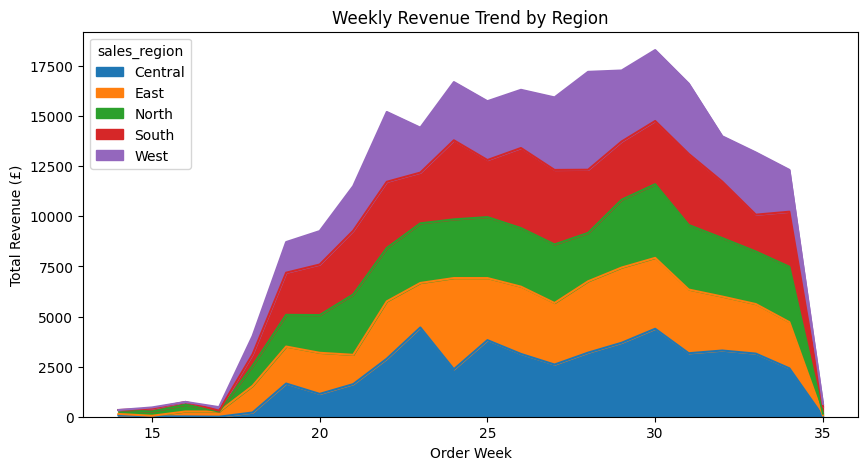

In [887]:
weekly_revenue_pivot.plot(kind='area', stacked=True, figsize=(10, 5))
plt.title("Weekly Revenue Trend by Region")
plt.xlabel("Order Week")
plt.ylabel("Total Revenue (£)")
plt.show()

•	Weekly revenue rises sharply from early weeks, peaks around weeks 29–31, and then declines toward the end, indicating a clear mid-period demand surge.

•	All regions follow a similar trend, with Central and West contributing the largest share of revenue during peak weeks, suggesting broad-based growth rather than region-specific spikes.

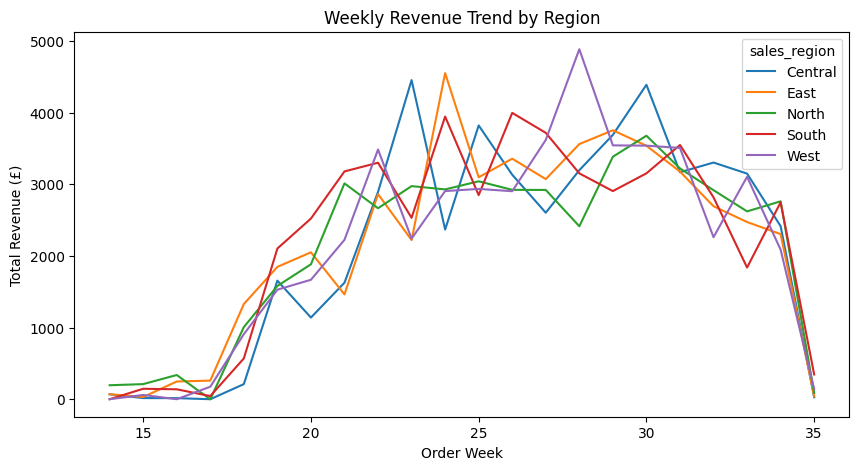

In [888]:
import matplotlib.pyplot as plt

weekly_revenue_pivot.plot(figsize=(10, 5))
plt.title("Weekly Revenue Trend by Region")
plt.xlabel("Order Week")
plt.ylabel("Total Revenue (£)")
plt.show()

### **5.2 Product category performance (revenue, quantity, discount)**

In [889]:
category_performance = (
    merged_df
    .groupby('category', as_index=False)
    .agg(total_revenue=('revenue', 'sum'),
         total_quantity=('quantity', 'sum'),
         avg_discount=('discount_applied', 'mean'),
         orders=('order_id', 'nunique'))
    .sort_values('total_revenue', ascending=False)
)

In [890]:
category_performance

,category,total_revenue,total_quantity,avg_discount,orders
0,Cleaning,93552.3995,3583,0.085667,1200
4,Storage,47037.7475,1733,0.080903,576
2,Outdoors,40018.6840,1515,0.081881,505
1,Kitchen,33933.6760,1226,0.075622,402
3,Personal Care,24892.2765,900,0.087043,301


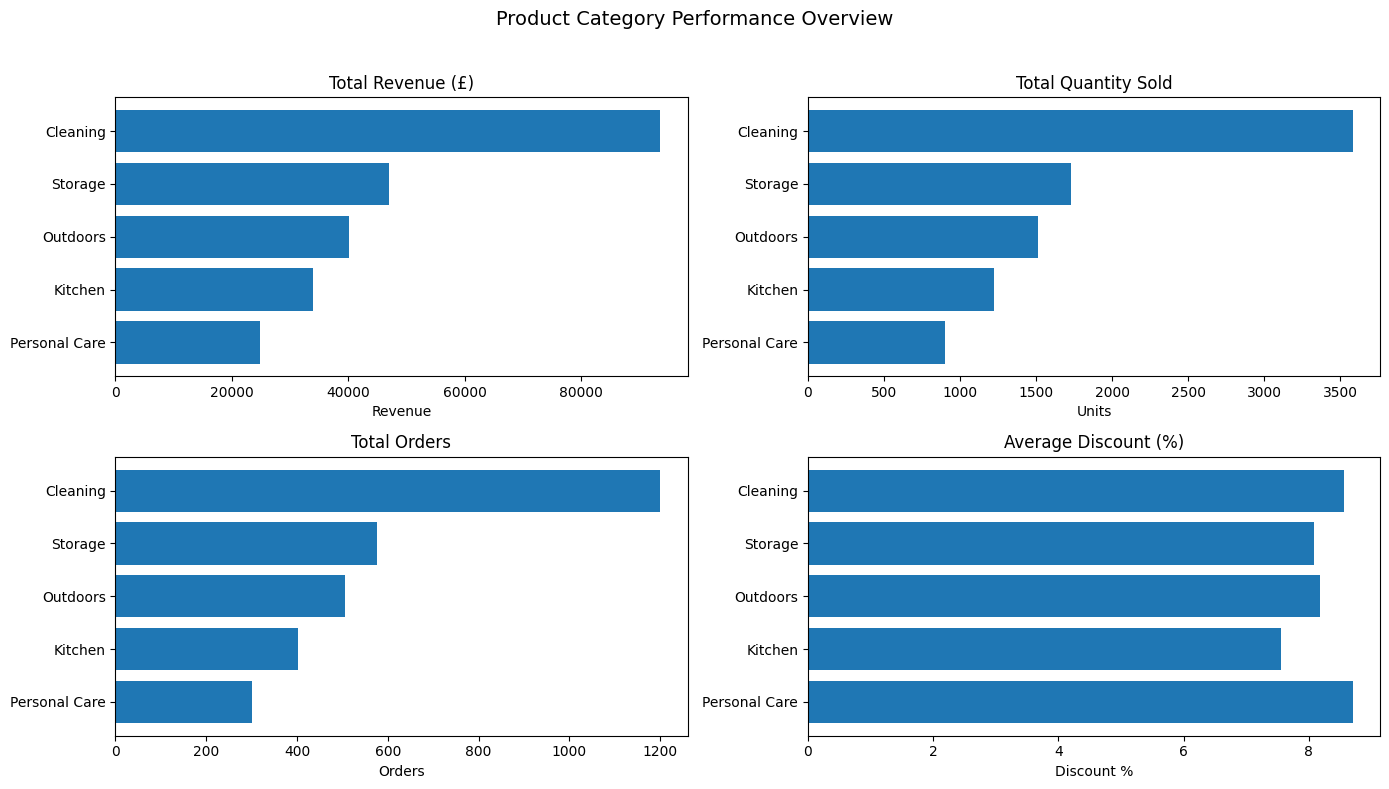

In [891]:
import matplotlib.pyplot as plt

cp = category_performance.sort_values('total_revenue', ascending=True)

fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# 1️⃣ Total Revenue
axes[0, 0].barh(cp['category'], cp['total_revenue'])
axes[0, 0].set_title('Total Revenue (£)')
axes[0, 0].set_xlabel('Revenue')

# 2️⃣ Total Quantity
axes[0, 1].barh(cp['category'], cp['total_quantity'])
axes[0, 1].set_title('Total Quantity Sold')
axes[0, 1].set_xlabel('Units')

# 3️⃣ Total Orders
axes[1, 0].barh(cp['category'], cp['orders'])
axes[1, 0].set_title('Total Orders')
axes[1, 0].set_xlabel('Orders')

# 4️⃣ Average Discount
axes[1, 1].barh(cp['category'], cp['avg_discount'] * 100)
axes[1, 1].set_title('Average Discount (%)')
axes[1, 1].set_xlabel('Discount %')

plt.suptitle('Product Category Performance Overview', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

•	Cleaning products dominate performance, leading in revenue, units sold, and order volume, making them the company’s core revenue driver.

•	Storage and Outdoors categories show strong mid-tier performance, suggesting stable demand and opportunities for targeted promotions to close the gap with Cleaning.


•	Personal Care generates the lowest revenue and orders but has the highest average discount, indicating weaker demand that currently relies on heavier discounting to drive sales.

•	Kitchen products perform moderately with lower discounts, suggesting more price-stable demand but limited volume growth.

### **5.3 Customer behaviour by loyalty_tier and signup_month**

In [892]:
# Create signup_month from signup_date
merged_df['signup_month'] = merged_df['signup_date'].dt.to_period('M').astype(str)

customer_behavior = (
    merged_df
    .groupby(['loyalty_tier', 'signup_month'], as_index=False)
    .agg(customers=('customer_id', 'nunique'),
         orders=('order_id', 'nunique'),
         total_revenue=('revenue', 'sum'),
         avg_order_value=('revenue', 'mean'))
    .sort_values(['loyalty_tier', 'signup_month'])
)

customer_behavior_pivot = merged_df.pivot_table(
    index='signup_month',
    columns='loyalty_tier',
    values='revenue',
    aggfunc='sum',
    fill_value=0
)

In [893]:
customer_behavior

,loyalty_tier,signup_month,customers,orders,total_revenue,avg_order_value
0,Bronze,2024-07,10,57,4038.7480,70.855228
1,Bronze,2024-08,10,46,3831.0110,83.282848
2,Bronze,2024-09,7,36,2685.4130,74.594806
3,Bronze,2024-10,12,53,4247.2735,80.137236
4,Bronze,2024-11,9,50,4149.2955,82.985910
5,Bronze,2024-12,10,47,3731.7485,79.398904
6,Bronze,2025-01,12,57,4176.9345,73.279553
7,Bronze,2025-02,8,55,4756.9695,86.490355
8,Bronze,2025-03,5,33,3056.8440,92.631636
9,Bronze,2025-04,9,52,4271.2535,82.139490


In [895]:
customer_behavior_pivot.head(5)

loyalty_tier,Bronze,Gold,Silver,Unknown
signup_month,,,,
2024-07,4038.7480,11411.8070,2036.8180,0.0
2024-08,3831.0110,15645.4105,4277.3885,0.0
2024-09,2685.4130,12256.4745,3661.9845,0.0
2024-10,4247.2735,12389.5165,5842.5210,0.0
2024-11,4149.2955,11193.1330,6728.8815,0.0


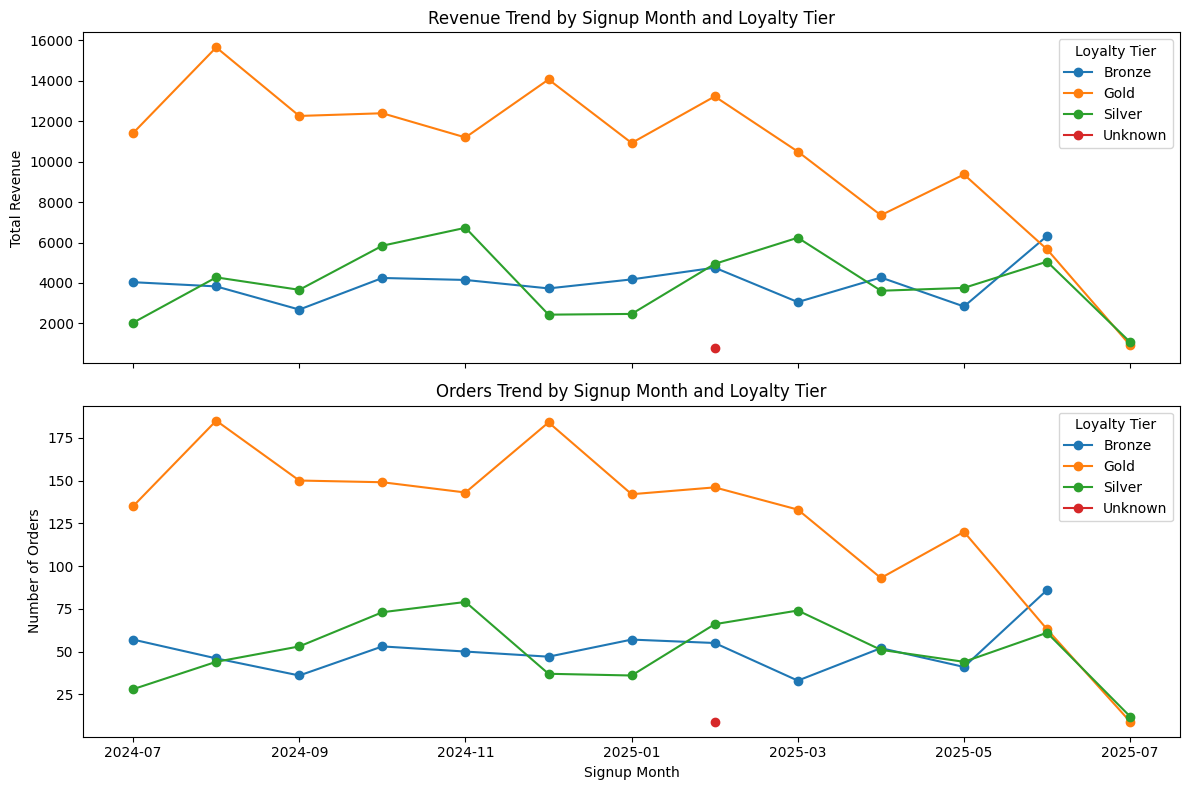

In [896]:
import matplotlib.pyplot as plt

rev_pivot = customer_behavior.pivot(
    index='signup_month',
    columns='loyalty_tier',
    values='total_revenue'
)

orders_pivot = customer_behavior.pivot(
    index='signup_month',
    columns='loyalty_tier',
    values='orders'
)
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# 1️⃣ Revenue trend
rev_pivot.plot(ax=axes[0], marker='o')
axes[0].set_title('Revenue Trend by Signup Month and Loyalty Tier')
axes[0].set_ylabel('Total Revenue')
axes[0].legend(title='Loyalty Tier')

# 2️⃣ Orders trend
orders_pivot.plot(ax=axes[1], marker='o')
axes[1].set_title('Orders Trend by Signup Month and Loyalty Tier')
axes[1].set_ylabel('Number of Orders')
axes[1].set_xlabel('Signup Month')
axes[1].legend(title='Loyalty Tier')

plt.tight_layout()
plt.show()

•	Gold-tier customers consistently generate the highest revenue and order volumes, though both decline in later signup months.

•	Silver and Bronze tiers show steadier, lower-volume trends, while the Unknown tier contributes minimally, indicating limited impact on overall performance.

### **5.4 Delivery performance by region and price_band**

In [897]:
delivery_performance = (
    merged_df
    .groupby(['sales_region', 'price_band'], as_index=False)
    .agg(orders=('order_id', 'nunique'),
         late_orders=('is_late', 'sum'),
         late_rate=('is_late', 'mean'),
         total_revenue=('revenue', 'sum'))
)

# Optional: nicer percentage column
delivery_performance['late_rate_pct'] = (delivery_performance['late_rate'] * 100).round(2)

delivery_performance

/tmp/ipython-input-3718250.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['sales_region', 'price_band'], as_index=False)


,sales_region,price_band,orders,late_orders,late_rate,total_revenue,late_rate_pct
0,Central,Low,112,43,0.383929,3499.1700,38.39
1,Central,Medium,225,88,0.391111,13966.4070,39.11
2,Central,High,263,104,0.395437,29887.8545,39.54
3,East,Low,95,39,0.410526,2917.9480,41.05
4,East,Medium,237,102,0.430380,14857.3730,43.04
5,East,High,267,109,0.408240,30237.1470,40.82
6,North,Low,107,41,0.383178,3271.7610,38.32
7,North,Medium,204,89,0.436275,12472.2545,43.63
8,North,High,293,106,0.361775,31034.4740,36.18
9,South,Low,97,32,0.329897,3126.1140,32.99


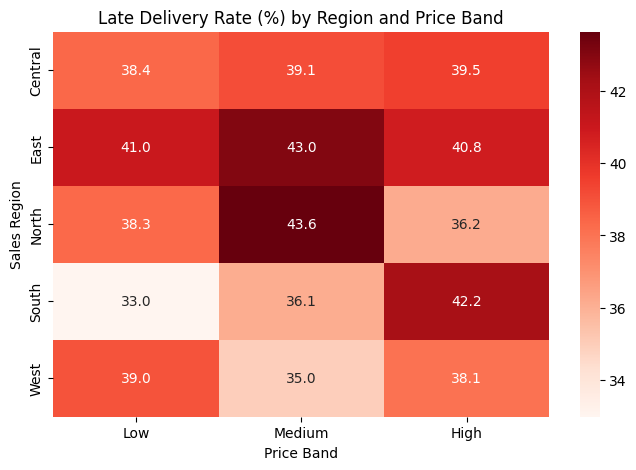

In [898]:
late_rate_pivot = delivery_performance.pivot(
    index='sales_region',
    columns='price_band',
    values='late_rate_pct'
)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.heatmap(
    late_rate_pivot,
    annot=True,
    fmt=".1f",
    cmap="Reds"
)
plt.title("Late Delivery Rate (%) by Region and Price Band")
plt.xlabel("Price Band")
plt.ylabel("Sales Region")
plt.show()

•	Late deliveries are highest in the Medium price band, particularly in North and East regions, indicating a consistent operational bottleneck.

•	High-price orders also show elevated delay rates in the South, suggesting priority areas for logistics improvements where revenue impact is likely highest.

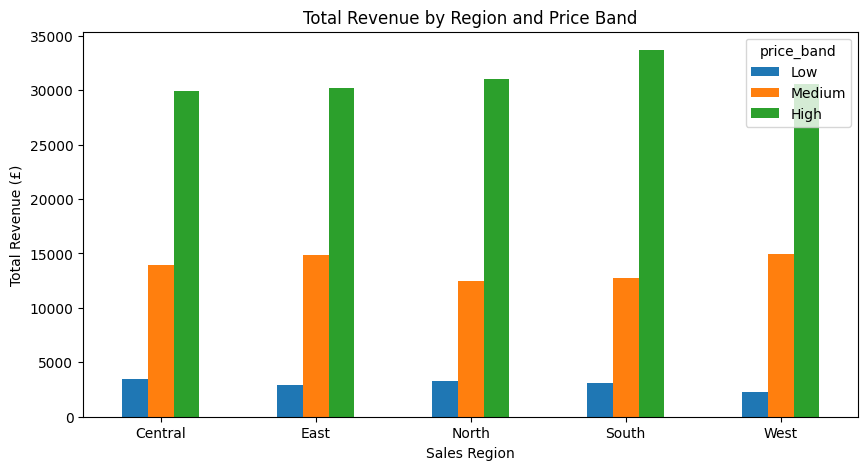

In [899]:
# revenue impact by region and price band
revenue_pivot = delivery_performance.pivot(
    index='sales_region',
    columns='price_band',
    values='total_revenue'
)
revenue_pivot.plot(
    kind='bar',
    figsize=(10, 5)
)
plt.title("Total Revenue by Region and Price Band")
plt.xlabel("Sales Region")
plt.ylabel("Total Revenue (£)")
plt.xticks(rotation=0)
plt.show()

•	High-price products drive the majority of revenue across all regions, with the South and North showing the strongest high-price revenue contribution.

•	Low-price products contribute relatively little to total revenue, suggesting that growth and margin improvements should focus on Medium and High price bands.

### **5.5 Preferred payment methods by loyalty_tier**

In [900]:
payment_preference = (
    merged_df
    .groupby(['loyalty_tier', 'payment_method'], as_index=False)
    .agg(orders=('order_id', 'nunique'),
         total_revenue=('revenue', 'sum'))
    .sort_values(['loyalty_tier', 'orders'], ascending=[True, False])
)

payment_preference_pivot = merged_df.pivot_table(
    index='loyalty_tier',
    columns='payment_method',
    values='order_id',
    aggfunc='nunique',
    fill_value=0
)

In [901]:
payment_preference

,loyalty_tier,payment_method,orders,total_revenue
1,Bronze,Credit Card,278,21893.9165
0,Bronze,Bank Transfer,175,13777.6895
2,Bronze,Paypal,160,12435.0490
4,Gold,Credit Card,831,66819.2565
5,Gold,Paypal,419,34476.6590
3,Gold,Bank Transfer,400,33486.9120
6,Gold,Unknown,2,104.4030
8,Silver,Credit Card,304,23744.4430
7,Silver,Bank Transfer,191,15859.2505
9,Silver,Paypal,162,12355.5570


In [902]:
payment_preference_pivot

payment_method,Bank Transfer,Credit Card,Paypal,Unknown
loyalty_tier,,,,
Bronze,175,278,160,0
Gold,400,831,419,2
Silver,191,304,162,1
Unknown,0,6,3,0


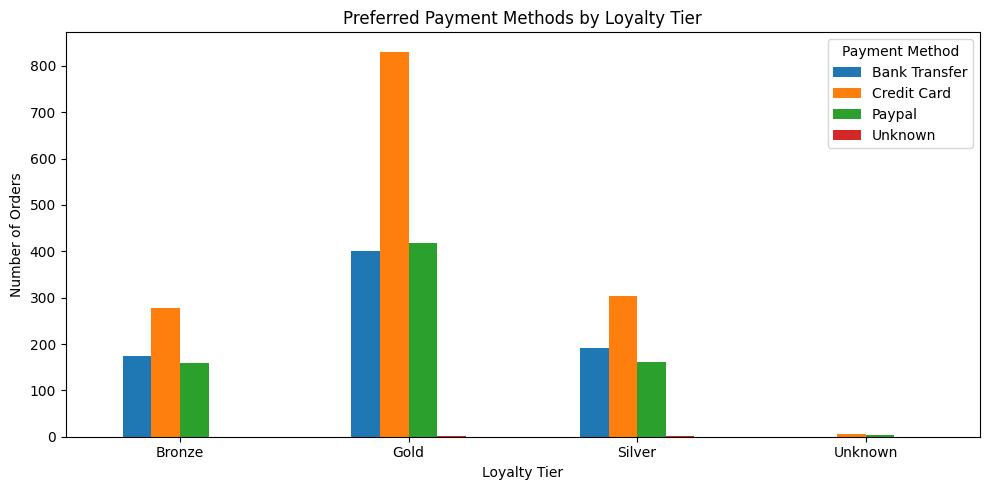

In [903]:
import matplotlib.pyplot as plt

payment_preference_pivot.plot(
    kind='bar',
    figsize=(10, 5)
)

plt.title('Preferred Payment Methods by Loyalty Tier')
plt.xlabel('Loyalty Tier')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.legend(title='Payment Method')
plt.tight_layout()
plt.show()

•	Credit cards are the dominant payment method across all loyalty tiers, especially among Gold customers, indicating a strong preference for fast, convenient payments.

•	Bank transfers and PayPal are secondary options, with higher usage among Gold and Silver tiers, while the Unknown tier contributes negligible volume, suggesting limited impact on payment strategy.

## **6. Visual Exploration**

### **6.1 Line plot — Weekly revenue trends by region**

<Figure size 1000x500 with 0 Axes>

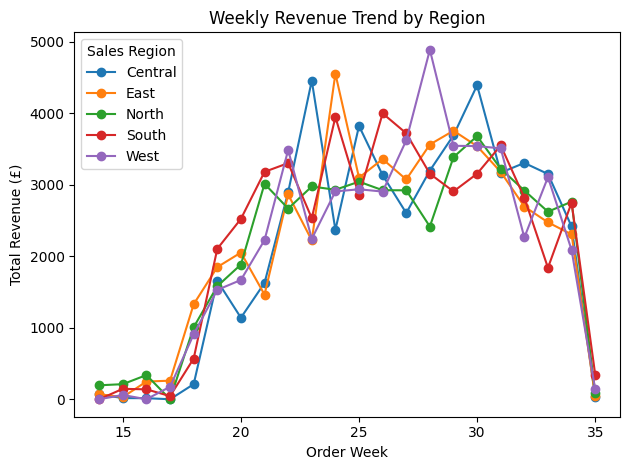

In [904]:
import matplotlib.pyplot as plt

weekly_rev = merged_df.pivot_table(
    index='order_week', columns='sales_region', values='revenue', aggfunc='sum', fill_value=0
).sort_index()

plt.figure(figsize=(10,5))
weekly_rev.plot(marker='o')
plt.title('Weekly Revenue Trend by Region')
plt.xlabel('Order Week')
plt.ylabel('Total Revenue (£)')
plt.legend(title='Sales Region')
plt.tight_layout()
plt.show()

•	Revenue rises sharply from early weeks and peaks around weeks 25–30 across all regions, indicating a strong mid-period demand cycle.

•	Central and West regions show the highest peaks, while all regions decline toward the end, suggesting seasonality rather than region-specific issues.

### **6.2 Bar chart — Top 5 categories by revenue**

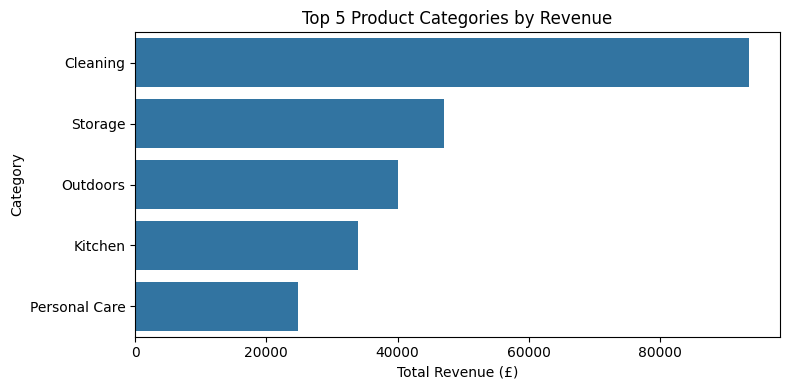

In [905]:
import seaborn as sns
import matplotlib.pyplot as plt

top5_cat = (merged_df.groupby('category', as_index=False)['revenue'].sum()
            .sort_values('revenue', ascending=False).head(5))

plt.figure(figsize=(8,4))
sns.barplot(data=top5_cat, x='revenue', y='category')
plt.title('Top 5 Product Categories by Revenue')
plt.xlabel('Total Revenue (£)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

•	Cleaning products generate the highest revenue by a wide margin, making them the primary contributor to overall sales.

•	Storage and Outdoors form a strong mid-tier, while Personal Care underperforms, indicating potential need for product or pricing strategy review.

### **6.3 Boxplot — Quantity vs Discount across categories**

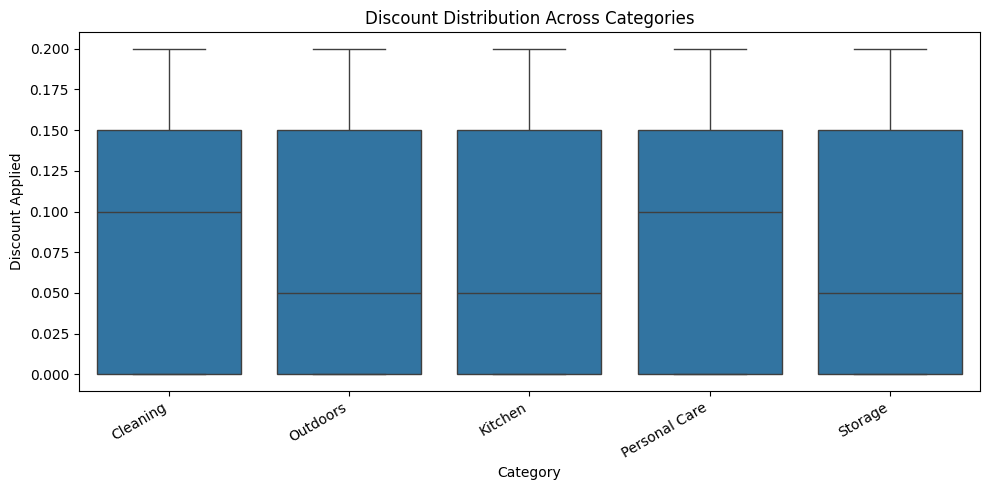

In [909]:
plt.figure(figsize=(10,5))
sns.boxplot(data=merged_df, x='category', y='discount_applied')
plt.title('Discount Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Discount Applied')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

•	Cleaning and Personal Care show higher and more variable discounts, indicating stronger reliance on promotions.

•	Kitchen and Storage have lower, tighter discount ranges, suggesting more price-stable demand.

### **6.4 Heatmap — Correlation (revenue, discount, quantity)**

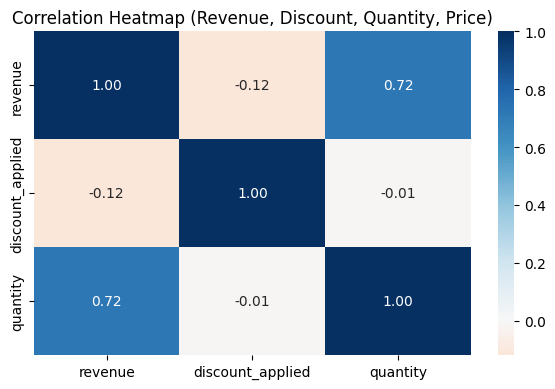

In [911]:
corr_cols = merged_df[['revenue','discount_applied','quantity']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_cols, annot=True, fmt='.2f', cmap='RdBu', center=0)
plt.title('Correlation Heatmap (Revenue, Discount, Quantity, Price)')
plt.tight_layout()
plt.show()

•	Revenue is strongly positively correlated with quantity (0.72), indicating that sales volume is the primary driver of revenue.

•	Discount shows a weak negative or near-zero relationship with revenue and quantity, suggesting that discounts have limited impact on increasing sales volume or revenue in this dataset.

### **6.5 Countplot — Orders by loyalty tier (hue = region)**

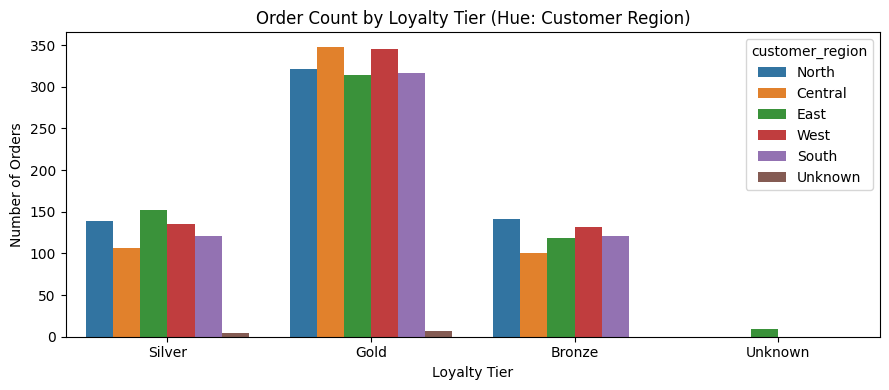

In [912]:
plt.figure(figsize=(9,4))
sns.countplot(data=merged_df, x='loyalty_tier', hue='customer_region')
plt.title('Order Count by Loyalty Tier (Hue: Customer Region)')
plt.xlabel('Loyalty Tier')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

•	Gold-tier customers place the highest number of orders across all regions, making them the most valuable and engaged segment. in this segment sales volume is higher in central and west than other region.

•	Silver and Bronze tiers contribute moderate order volumes, while Unknown-tier customers are negligible, suggesting limited strategic importance compared to identified loyalty segments.

### **6.6 Stacked bar — Delivery status by price band**

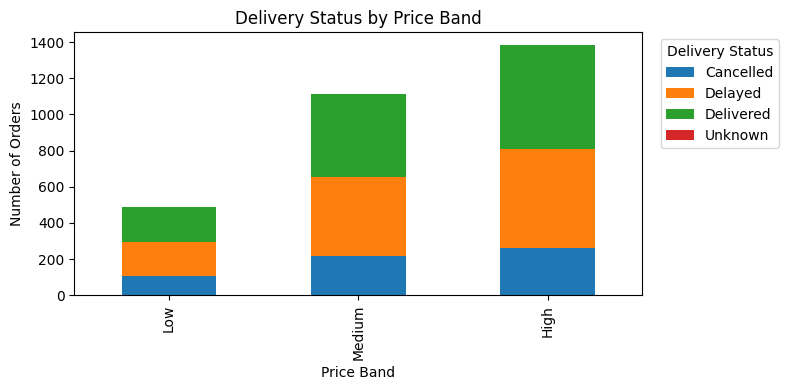

In [913]:
delivery_ct = pd.crosstab(merged_df['price_band'], merged_df['delivery_status'])

delivery_ct.plot(kind='bar', stacked=True, figsize=(8,4))
plt.title('Delivery Status by Price Band')
plt.xlabel('Price Band')
plt.ylabel('Number of Orders')
plt.legend(title='Delivery Status', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

•	Medium and High price bands account for most delivery issues, with a noticeably higher number of delayed orders compared to Low-priced products.

•	As order volume increases with price, delivery reliability becomes more critical for higher-value items, highlighting a need to prioritise logistics performance in the Medium and High price bands.

## **7. Business Ques Answer**

**1️⃣ Which product categories drive the most revenue, and in which regions?**

Cleaning products are the top revenue drivers, significantly outperforming other categories across all regions.
The Central, West, and North regions contribute the highest revenue for these categories, indicating strong and consistent demand.

**2️⃣ Do discounts lead to more items sold?**

Discounts show little to no positive correlation with quantity sold.
Sales volume is driven more by demand and product type than discounting, suggesting that aggressive discounts do not significantly increase items sold.

**3️⃣ Which loyalty tier generates the most value?**

The Gold loyalty tier generates the highest revenue and order volume, consistently outperforming Silver and Bronze tiers.
This group represents the most valuable and engaged customers.

**4️⃣ Are certain regions struggling with delivery delays?**

Yes. East and North regions, especially for Medium and High price bands, experience the highest late delivery rates.
These regions represent key operational risk areas due to their combination of high revenue and higher delays.

**5️⃣ Do customer signup patterns influence purchasing activity?**

Yes. Customers who signed up during mid-period months show higher revenue and order activity, particularly within the Gold tier.
This indicates that cohort timing and customer maturity influence purchasing behaviour.

**📌 Executive takeaway**

The analysis shows that revenue growth is driven by high-value product categories and loyal customers, while operational improvements in delivery performance—especially in high-revenue regions—present the greatest opportunity for business impact.

## **8. Recommendations**

1️⃣ Prioritise Cleaning Category for Growth

The Cleaning category consistently drives the highest revenue and order volume across all regions.
➡️ Maintain strong product availability, consider premium product extensions, and protect margins rather than heavy discounting.

⸻

2️⃣ Reposition Personal Care with Targeted Promotions

Personal Care shows the lowest revenue but highest discount variability, indicating weaker organic demand.
➡️ Test targeted promotions or bundling strategies in high-performing regions to stimulate demand without excessive discounting.

⸻

3️⃣ Strengthen Gold Loyalty Tier Retention

The Gold loyalty tier generates the most revenue and orders, making it the most valuable customer segment.
➡️ Introduce exclusive benefits (early access, faster shipping, loyalty rewards) to retain and further monetise this group.

⸻

4️⃣ Improve Delivery Reliability in High-Risk Regions

East and North regions, especially for Medium and High price bands, show the highest late delivery rates.
➡️ Prioritise logistics improvements or alternative shipping partners in these regions to reduce delays for high-value orders.

⸻

5️⃣ Optimise Pricing Strategy Over Discounting

Discounts show minimal impact on increasing quantity sold, while revenue is strongly driven by volume and category demand.
➡️ Shift focus from broad discounting to product availability, pricing optimisation, and customer experience improvements.

⸻

6️⃣ Align Marketing with Customer Signup Cohorts

Customers who signed up during mid-period months exhibit higher purchasing activity, particularly in the Gold tier.
➡️ Use cohort-based marketing campaigns and onboarding strategies to replicate high-performing signup periods.

⸻

📌 Executive Summary Line (Optional)

The strongest opportunities lie in scaling high-performing categories and loyal customers while addressing delivery inefficiencies that threaten revenue in key regions.

## **9. Optional Stretch Tasks**


9.1 Advanced Filtering using .query()

🎯 Customers who:

	•	Signed up in Q2
	•	Placed an order within 14 days
	•	Received a discount > 20%

In [920]:
merged_df['signup_quarter'] = merged_df['signup_date'].dt.to_period('Q').astype(str)
merged_df['days_from_signup'] = (
    merged_df['order_date'] - merged_df['signup_date']
).dt.days

q2_discount_customers = merged_df.query(
    "signup_quarter == '2025Q2' and days_from_signup <= 14 and discount_applied >= 0.20"
)

q2_discount_customers[['customer_id', 'order_id', 'discount_applied', 'days_from_signup']].head()

,customer_id,order_id,discount_applied,days_from_signup
155,C00369,O544736,0.2,-10.0
364,C00320,O296691,0.2,-42.0
582,C00099,O141779,0.2,9.0
625,C00126,O459230,0.2,6.0
812,C00369,O359280,0.2,-50.0


In [919]:
merged_df['signup_quarter'].value_counts()
merged_df[['days_from_signup']].describe()
merged_df['discount_applied'].describe()

,discount_applied
count,2984.000000
mean,0.082892
std,0.074044
min,0.000000
25%,0.000000
50%,0.050000
75%,0.150000
max,0.200000


there is no discount more than 20%. Max is 20%. days_from_signup -50 means --> Order happened 50 days before signup. This happens due to **data quality** (Signup dates and order dates are generated independently,No constraint enforces signup must be before order) and **real world edge cases** (Guest checkout before account creation,Account created after first purchase,Historical orders migrated after signup)

9.2 Normalise Revenue or Price using MinMaxScaler

🎯 Why?

	•	Makes features comparable
	•	Useful for scoring, clustering, or dashboards

In [921]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

merged_df['revenue_normalised'] = scaler.fit_transform(
    merged_df[['revenue']]
)
merged_df[['revenue', 'revenue_normalised']].head(5)

,revenue,revenue_normalised
0,117.750,0.457431
1,94.600,0.361987
2,25.228,0.075976
3,26.208,0.080016
4,38.096,0.129029


9.3 Flag Underperforming Products

🎯 Definition (Business Rule)

A product is underperforming if:

	•	Low sales volume
	•	High discounting
	•	High delivery delays

In [922]:
product_perf = (
    merged_df
    .groupby(['product_id', 'product_name'], as_index=False)
    .agg(
        total_quantity=('quantity', 'sum'),
        avg_discount=('discount_applied', 'mean'),
        late_rate=('is_late', 'mean')
    )
)

underperforming_products = product_perf.query(
    "total_quantity < 50 and avg_discount > 0.15 and late_rate > 0.40"
)
underperforming_products.sort_values('total_quantity').head()

,product_id,product_name,total_quantity,avg_discount,late_rate


In [923]:
product_perf[['total_quantity','avg_discount','late_rate']].describe()

,total_quantity,avg_discount,late_rate
count,30.000000,30.000000,30.000000
mean,298.566667,0.082867,0.390815
std,33.120140,0.007999,0.060486
min,236.000000,0.067593,0.250000
25%,275.250000,0.077680,0.350850
50%,299.000000,0.082717,0.382926
75%,316.750000,0.087707,0.440104
max,373.000000,0.097115,0.500000


In [927]:
product_perf.assign(
    low_qty = product_perf['total_quantity'] <= 275,
    high_disc = product_perf['avg_discount'] >= 0.085,
    high_delay = product_perf['late_rate'] >= 0.44
)[['low_qty','high_disc','high_delay']].sum()

,0
low_qty,8
high_disc,9
high_delay,8


In [928]:
product_perf.head()

,product_id,product_name,total_quantity,avg_discount,late_rate,risk_score
0,P0001,Storage Product 39,273,0.082955,0.250000,1
1,P0002,Cleaning Product 82,243,0.080460,0.402299,1
2,P0003,Cleaning Product 85,278,0.096111,0.333333,1
3,P0004,Kitchen Product 82,314,0.068878,0.418367,0
4,P0005,Personal Care Product 1,271,0.094022,0.500000,3


In [929]:
low_qty_products = product_perf.loc[
    product_perf['total_quantity'] <= 275,
    ['product_id', 'product_name', 'total_quantity']
].sort_values('total_quantity')

low_qty_products

,product_id,product_name,total_quantity
8,P0009,Outdoors Product 13,236
1,P0002,Cleaning Product 82,243
7,P0008,Storage Product 47,252
28,P0029,Cleaning Product 69,264
11,P0012,Cleaning Product 29,265
4,P0005,Personal Care Product 1,271
0,P0001,Storage Product 39,273
20,P0021,Kitchen Product 70,275


In [930]:
high_discount_products = product_perf.loc[
    product_perf['avg_discount'] >= 0.085,
    ['product_id', 'product_name', 'avg_discount']
].sort_values('avg_discount', ascending=False)

high_discount_products

,product_id,product_name,avg_discount
5,P0006,Cleaning Product 16,0.097115
17,P0018,Storage Product 37,0.096196
2,P0003,Cleaning Product 85,0.096111
4,P0005,Personal Care Product 1,0.094022
19,P0020,Cleaning Product 40,0.093500
13,P0014,Outdoors Product 91,0.090826
6,P0007,Personal Care Product 64,0.089320
7,P0008,Storage Product 47,0.087879
9,P0010,Cleaning Product 70,0.087190


In [931]:
high_delay_products = product_perf.loc[
    product_perf['late_rate'] >= 0.44,
    ['product_id', 'product_name', 'late_rate']
].sort_values('late_rate', ascending=False)

high_delay_products

,product_id,product_name,late_rate
4,P0005,Personal Care Product 1,0.500000
28,P0029,Cleaning Product 69,0.489362
22,P0023,Outdoors Product 32,0.476190
21,P0022,Cleaning Product 86,0.471698
5,P0006,Cleaning Product 16,0.451923
18,P0019,Kitchen Product 42,0.450549
12,P0013,Cleaning Product 94,0.450000
23,P0024,Storage Product 87,0.444444
